In [832]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [833]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso , LassoCV , Ridge , RidgeCV, ElasticNetCV, ElasticNet


### 1. Read the dataset (tab, csv, xls, txt, inbuilt dataset)

In [834]:
data = pd.read_csv('Ecommerce.csv')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### 2. Summarizing important observations from the data set 

#### a. What are the number of rows and no. of cols & types of variables (continuous, categorical etc.) 

In [835]:
print ( "Number of rows:" , data.shape [ 0 ] )
print ( "Number of columns:" , data.shape [ 1 ] )

Number of rows: 500
Number of columns: 8


In [836]:
categorical = data.select_dtypes ( include = "object" ).columns
print ( "The categorical variables are:\n" , categorical )
print ( "\n" )
continuous = data.select_dtypes ( exclude = "object" ).columns
print ( "The continuous variables are:\n" , continuous )

The categorical variables are:
 Index(['Email', 'Address', 'Avatar'], dtype='object')


The continuous variables are:
 Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')


#### b. Calculate five-point summary for numerical variables

In [837]:
#For numerical features:
data.describe ( ).T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [838]:
#For all features:
data.describe ( include = "all" ).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Email,500,500,kyang@diaz.org,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,500,500,"24645 Valerie Unions Suite 582\nCobbborough, D...",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avatar,500,138,GreenYellow,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg. Session Length,500,NaN,NaN,NaN,33.0532,0.992563,29.5324,32.3418,33.082,33.712,36.1397
Time on App,500,NaN,NaN,NaN,12.0525,0.994216,8.50815,11.3882,11.9832,12.7538,15.127
Time on Website,500,NaN,NaN,NaN,37.0604,1.01049,33.9138,36.3493,37.0694,37.7164,40.0052
Length of Membership,500,NaN,NaN,NaN,3.53346,0.999278,0.269901,2.93045,3.53398,4.1265,6.92269
Yearly Amount Spent,500,NaN,NaN,NaN,499.314,79.3148,256.671,445.038,498.888,549.314,765.518


#### c. Summarize observations for categorical variables – no. of categories, % observations in each category 

In [839]:
#This gives the number of categories and % observation in each category.
for i in categorical:
    print ( "Column:" , i )
    print ( data [ i ].value_counts ( ) ) 
    d = data [ i ].value_counts ( )
    j = 0
    for i in d.index:
        print ( i , "\t" , round ( ( ( d [ j ] / data.shape [ 0 ] ) * 100  ) , 2 ) , "%" )
        j += 1
    print ( "\n" )

Column: Email
kyang@diaz.org                  1
melissa08@rowe.net              1
dvasquez@wiley.com              1
rcarter@crane-thompson.org      1
tina16@santiago.com             1
                               ..
cwilson@hotmail.com             1
katherinegray@yahoo.com         1
stevenanderson@yahoo.com        1
john96@chan-anderson.biz        1
charlesgutierrez@hotmail.com    1
Name: Email, Length: 500, dtype: int64
kyang@diaz.org 	 0.2 %
melissa08@rowe.net 	 0.2 %
dvasquez@wiley.com 	 0.2 %
rcarter@crane-thompson.org 	 0.2 %
tina16@santiago.com 	 0.2 %
crawforderik@price.org 	 0.2 %
amberchase@fowler.info 	 0.2 %
craigcastro@burgess.com 	 0.2 %
briangonzales@gmail.com 	 0.2 %
adamperkins@terrell.com 	 0.2 %
mark94@yahoo.com 	 0.2 %
william28@gmail.com 	 0.2 %
dominguezmaria@gmail.com 	 0.2 %
jeffreydawson@gmail.com 	 0.2 %
rhonda01@gmail.com 	 0.2 %
hornesteven@gmail.com 	 0.2 %
smithtracey@mcgee.com 	 0.2 %
solischristina@gmail.com 	 0.2 %
bradleysmith@barber.com 	 0.2 %
bushs

xkaufman@gmail.com 	 0.2 %
tinasmith@martinez.info 	 0.2 %
david81@hotmail.com 	 0.2 %
nathan84@lowery.net 	 0.2 %
stevenking@patterson.com 	 0.2 %
lamryan@curtis-garcia.net 	 0.2 %
zscott@wright.com 	 0.2 %
jenniferjenkins@jones.com 	 0.2 %
keith13@yahoo.com 	 0.2 %
chansen@holt.com 	 0.2 %
yvaughn@meyer.com 	 0.2 %
waltonkaren@gmail.com 	 0.2 %
turnerryan@hotmail.com 	 0.2 %
nicolegay@jennings.com 	 0.2 %
veronicapruitt@hotmail.com 	 0.2 %
jasonhensley@yahoo.com 	 0.2 %
hoganrichard@george.com 	 0.2 %
nblack@smith-romero.biz 	 0.2 %
david43@richards.com 	 0.2 %
ellenlucas@cox.org 	 0.2 %
wheelernancy@hernandez.com 	 0.2 %
davisrobert@hicks-smith.com 	 0.2 %
richard35@hale-duncan.net 	 0.2 %
webertom@phelps.com 	 0.2 %
jessica04@christian-riley.com 	 0.2 %
karenosborne@yahoo.com 	 0.2 %
tknapp@yahoo.com 	 0.2 %
pkline@hotmail.com 	 0.2 %
johnsonpaul@keller-woodard.org 	 0.2 %
halljohn@yahoo.com 	 0.2 %
welchashlee@hotmail.com 	 0.2 %
heatherhall@yahoo.com 	 0.2 %
jacksonking@mccormick

Tylermouth, ME 94450 	 0.2 %
PSC 1634, Box 8167
APO AA 49814 	 0.2 %
1576 Lane Shoal
Rogerton, PR 63867-3426 	 0.2 %
2380 Fisher Neck Suite 233
Brianland, AZ 34453-0625 	 0.2 %
680 Jennifer Lodge Apt. 808
Brendachester, TX 05000-5873 	 0.2 %
33213 Tanner Knolls Apt. 519
Whiteborough, OR 37119-7790 	 0.2 %
75805 Larry Mills
East Cristian, MH 53820 	 0.2 %
2559 Harris Pines Apt. 514
Michaelshire, ME 21753-8834 	 0.2 %
Unit 7029 Box 3429
DPO AE 56975 	 0.2 %
922 Hampton Path Suite 198
Port Jasonmouth, FL 46623 	 0.2 %
983 Ross Glen
West Jessica, NJ 42860-5757 	 0.2 %
19704 Kaitlin Flat
West Andrewtown, VI 38642 	 0.2 %
02136 White Grove Suite 418
Marytown, DE 70033 	 0.2 %
14220 Carla Flat Suite 521
Lake Matthew, DE 06183 	 0.2 %
001 Estrada Union
Lewismouth, TN 47360 	 0.2 %
51173 Curtis Cliff Apt. 727
Ramoston, DE 32714-4579 	 0.2 %
5661 Grant Centers
Stevensfurt, CT 53959 	 0.2 %
13799 Cortez Inlet Suite 733
East Stevenshire, AL 32757 	 0.2 %
68388 Reyes Lights Suite 692
Josephbury, WV

East Patrickbury, WY 65946 	 0.2 %
24725 Neal Lock
Cynthiaville, NY 51578 	 0.2 %
66880 Mckinney Hills
Matthewchester, MH 88386 	 0.2 %
049 Matthew Terrace
Lake Matthew, MS 20210 	 0.2 %
374 Dana Junctions
Langside, WI 36474 	 0.2 %
7955 Samantha Walk Suite 230
North Luis, IL 44629 	 0.2 %
64460 Morris Fords
Gonzalesmouth, MI 40832 	 0.2 %
92028 Thomas Mountains Suite 044
New Matthew, MI 02429-0994 	 0.2 %
32303 Baldwin Causeway
South Robertside, HI 58126 	 0.2 %
1279 Douglas Mountains
Port Christopherberg, RI 32811-8325 	 0.2 %
581 Gilmore Port
Heatherville, MS 20879 	 0.2 %
981 David Square
New Jacquelinetown, AK 66018-4092 	 0.2 %
4547 Stafford Throughway Apt. 178
North Patrick, MD 60768-4837 	 0.2 %
543 Reynolds Burg
Melindaberg, KY 46631 	 0.2 %
66340 Michael Lane Suite 878
West Brian, LA 69137-1147 	 0.2 %
USNS Jacobs
FPO AE 71507-1312 	 0.2 %
15863 Harrington Glens Suite 012
Marystad, LA 50652-8210 	 0.2 %
94730 Martin Mount
New Matthew, VI 08142-6708 	 0.2 %
6705 Miller Orchard

### 3.  Checking for defects in the data and performing necessary actions to ‘fix’ those defects:

#### a. Checking for missing/null values

In [840]:
#Number of null values
data.isnull ( ).sum ( )

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [841]:
#% of null values
data.isnull ( ).sum ( ) / data.shape [ 0 ] * 100

Email                   0.0
Address                 0.0
Avatar                  0.0
Avg. Session Length     0.0
Time on App             0.0
Time on Website         0.0
Length of Membership    0.0
Yearly Amount Spent     0.0
dtype: float64

In [842]:
#To find missing values
data.info ( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


- There are no missing values

#### b.Checking target variable if normally distributed

Feature Name: Avg. Session Length
Skewness for Avg. Session Length is -0.03217480705175736


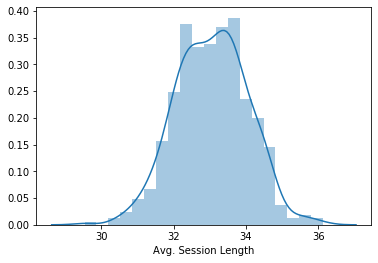

Feature Name: Time on App
Skewness for Time on App is -0.0891210975109327


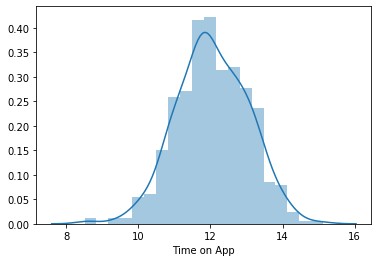

Feature Name: Time on Website
Skewness for Time on Website is 0.012141880271484537


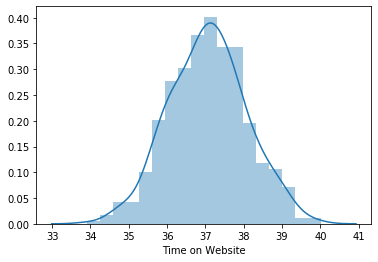

Feature Name: Length of Membership
Skewness for Length of Membership is -0.10660805308863916


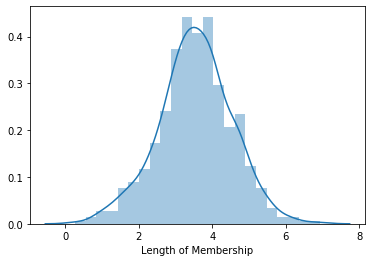

Feature Name: Yearly Amount Spent
Skewness for Yearly Amount Spent is 0.034790184115234546


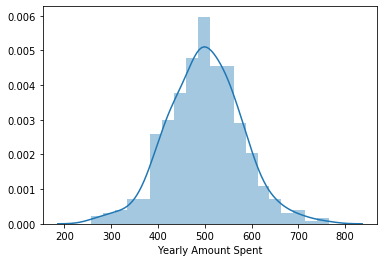

In [843]:
#Distribution for continuous
for i in continuous:
    print ( "Feature Name:" , i )
    print ( "Skewness for" , i , "is" , data [ i ].skew ( ) )
    sns.distplot ( data [ i ] )
    plt.show ( )

- The distibution looks like normally distributed.

#### c. Do variables have outliers

Feature Name: Avg. Session Length


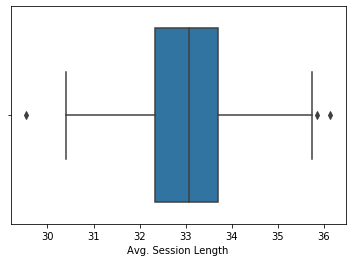

Feature Name: Time on App


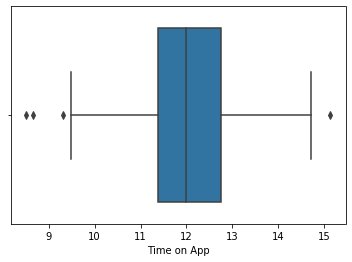

Feature Name: Time on Website


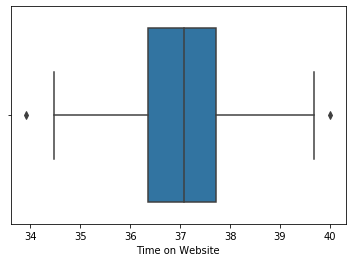

Feature Name: Length of Membership


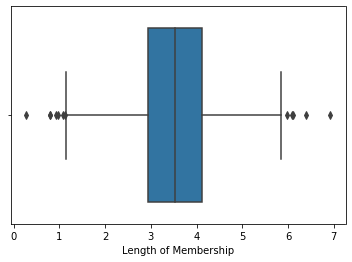

Feature Name: Yearly Amount Spent


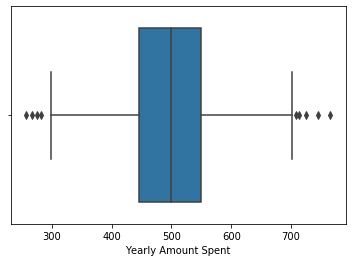

In [844]:
for i in continuous:
    print ( "Feature Name:" , i )
    sns.boxplot ( data [ i ] )
    plt.show ( )

In [845]:
continuous

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

- There maybe outliers in the features: 'Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership' and 'Yearly Amount Spent'.
- For 'Yearly Amount Spent', not need to rectify it.    

In [846]:
#Befor treatment
data.shape

(500, 8)

In [847]:
continuous

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [848]:
col = ['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership']

In [849]:
data1 =data.copy()

In [850]:
#To remove outliers:
for i in col:
    q1 = data1[i].quantile(q=0.25)
    q2 = data1[i].quantile()
    q3 = data1[i].quantile(q=0.75)
    iqr = q3-q1
    ul = q3+1.5*iqr
    ll = q1-1.5*iqr

    data1 = data1[(data1[i]>ul ) | (data1[i]>ll)] 

In [851]:
#After treatment
data1.shape

(487, 8)

In [852]:
loss_of_rows = data.shape[0] - data1.shape[0]

In [853]:
print('After treating for outliers number of records(rows) lost: ', loss_of_rows)

After treating for outliers number of records(rows) lost:  13


### 4.  Summarize relationships among variables 

#### a. Checking for correlation between the variables

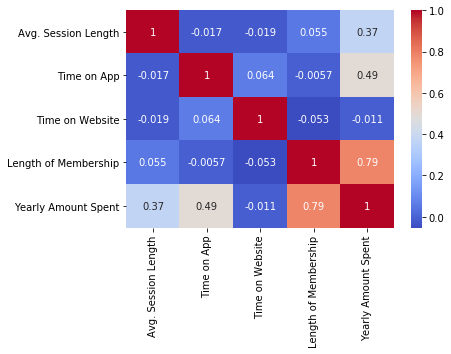

In [854]:
sns.heatmap ( data1.corr ( ) , annot = True, cmap='coolwarm')
plt.show ( )

- Good corellation between the independent variable

In [855]:
corr = data1.corr ( )
corr_target = corr [ 'Yearly Amount Spent' ]
corr_target

Avg. Session Length     0.372339
Time on App             0.494499
Time on Website        -0.010618
Length of Membership    0.786768
Yearly Amount Spent     1.000000
Name: Yearly Amount Spent, dtype: float64

- Yearly Amount Spent is correlated with Avg. Session Length
- Yearly Amount Spent is correlated with Time on App
- Yearly Amount Spent is highly correlated with Length of Membership

#### b.  Ploting all independent variables with the target.

Correlation of 'Yearly Amount Spent' with Avg. Session Length is: 0.372


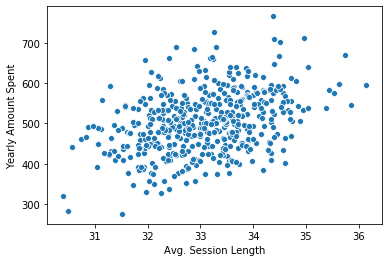

Correlation of 'Yearly Amount Spent' with Time on App is: 0.494


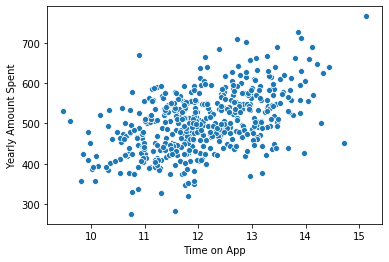

Correlation of 'Yearly Amount Spent' with Time on Website is: -0.011


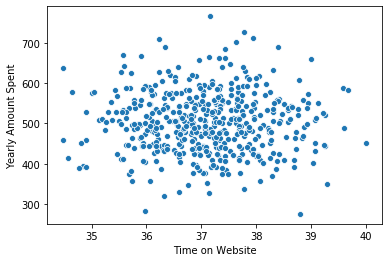

Correlation of 'Yearly Amount Spent' with Length of Membership is: 0.787


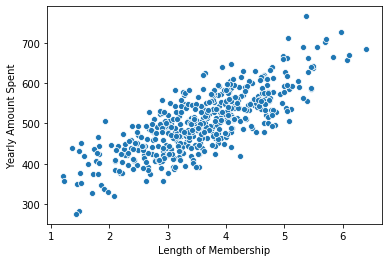

In [856]:
j = 0
for i in corr_target.index:
    if i == 'Yearly Amount Spent':
        break
    else:
        print ( "Correlation of 'Yearly Amount Spent' with" , i , "is:" , round ( corr_target [ j ] , 3 ) )
        j += 1
        sns.scatterplot ( data1 [ i ] , data1 [ 'Yearly Amount Spent' ] )
        plt.show ( )

- All independent features can form a linear relationship with the target variable.

### 5. Spliting the dataset into train and test (70:30) and checking if both train and test representative of the overall data? 

In [857]:
categorical

Index(['Email', 'Address', 'Avatar'], dtype='object')

In [858]:
X = data1.drop ( ['Email', 'Address', 'Avatar','Yearly Amount Spent'] , axis = 1 )
y = data1 [ 'Yearly Amount Spent' ]

In [859]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,487.0,33.055411,0.979273,30.393185,32.340848,33.078717,33.706633,36.139662
Time on App,487.0,12.077567,0.967415,9.477778,11.396637,12.005916,12.783032,15.126994
Time on Website,487.0,37.077176,1.001579,34.476878,36.363545,37.076795,37.720069,40.005182
Length of Membership,487.0,3.576350,0.934265,1.200484,2.970956,3.549036,4.130920,6.401229


In [860]:
y.describe()

count    487.000000
mean     503.015340
std       74.492360
min      275.918421
25%      449.001806
50%      501.874430
75%      549.975863
max      765.518462
Name: Yearly Amount Spent, dtype: float64

In [861]:
X_train , X_test , y_train , y_test = train_test_split ( X , y , test_size = 0.3 , random_state = 1 ) 

- To find wheather both train and test representative of the overall data, we can ascertain this statistically using 5 point summary. 

In [862]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,340.0,33.091241,0.986916,30.393185,32.383808,33.081514,33.773214,36.139662
Time on App,340.0,12.051679,0.967878,9.607315,11.360935,11.973532,12.766691,15.126994
Time on Website,340.0,37.108221,1.020355,34.487185,36.334263,37.151815,37.769357,40.005182
Length of Membership,340.0,3.576214,0.922573,1.200484,2.961541,3.533245,4.196298,6.401229


In [863]:
y_train.describe()

count    340.000000
mean     502.743847
std       73.512560
min      275.918421
25%      451.546126
50%      501.479203
75%      549.871479
max      765.518462
Name: Yearly Amount Spent, dtype: float64

In [864]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,147.0,32.972539,0.959556,30.492537,32.258952,33.078717,33.607466,35.630854
Time on App,147.0,12.137445,0.966982,9.477778,11.549531,12.064157,12.802536,14.715388
Time on Website,147.0,37.005370,0.956268,34.476878,36.391407,37.022269,37.620704,39.294043
Length of Membership,147.0,3.576664,0.963971,1.362674,3.003850,3.620355,4.100532,5.840506


In [865]:
y_test.describe()

count    147.000000
mean     503.643281
std       76.962744
min      282.471246
25%      444.056479
50%      503.217393
75%      550.918185
max      712.396327
Name: Yearly Amount Spent, dtype: float64

- By the above five point summary we can say that the split train and test represents the overall data.

### 6. Fitting a base model: 

In [866]:
x_const = sm.add_constant ( X )
model_base = sm.OLS ( y , x_const ).fit ( )
model_base.summary ( )

C:\Users\RasAlGhul\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.982
Model:                             OLS   Adj. R-squared:                  0.982
Method:                  Least Squares   F-statistic:                     6639.
Date:                 Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                         13:55:14   Log-Likelihood:                -1809.3
No. Observations:                  487   AIC:                             3629.
Df Residuals:                      482   BIC:                             3649.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1050.5388     23.497    -44.710      0.000   -1096.707   -1004.370
Avg. Session Length     25.7459      0.463     55.551      0.000      24.835      26.657
Time on App             38.8502      0.469     82.782      0.000      37.928      39.772
Time on Website          0.3615      0.454      0.796      0.426      -0.530       1.253
Length of Membership    61.4860      0.486    126.429      0.000      60.530      62.442
==============================================================================
Omnibus:                        0.489   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.783   Jarque-Bera (JB):                0.333
Skew:                          -0.043   Prob(JB):                        0.846
Kurtosis:                       3.095   Cond. No.                     2.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- We can observe that R2 is 98.2. The model as a whole is good as F-statistic > alpha.

In [867]:
y_pred = model_base.predict (  )
y_pred

array([594.62831425, 380.30821572, 505.06854739, 570.73684543,
       591.63828867, 638.98533046, 516.79322017, 558.39029084,
       559.40199304, 441.03145998, 508.95319209, 513.5026952 ,
       561.44459866, 460.7651077 , 451.31616508, 437.86168526,
       411.49025241, 456.93256315, 596.09101862, 534.80718987,
       421.7395137 , 433.07613636, 503.75778762, 703.20128617,
       437.92443647, 608.63409831, 485.25269838, 521.41427111,
       571.71007363, 484.73578523, 459.5343347 , 577.89433947,
       488.64395237, 512.85569452, 517.06025865, 349.72502808,
       486.86883055, 478.83008442, 545.90164867, 531.76463245,
       511.958519  , 577.94517492, 543.11297266, 447.57855388,
       551.33147937, 601.97132548, 562.73288512, 473.1510501 ,
       417.3043067 , 725.20722751, 442.94432546, 372.93873476,
       456.64201304, 516.78701884, 494.4254528 , 524.07271778,
       460.08863071, 481.52520576, 544.8140077 , 606.1902975 ,
       499.90649183, 621.57052003, 470.52468042, 535.12

In [868]:
data1.shape

(487, 8)

In [869]:
data1 [ "OLS Prediction" ] = list(y_pred)

In [870]:
data1.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,OLS Prediction
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,594.628314
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,380.308216
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,505.068547
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,570.736845
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,591.638289


In [871]:
#Bachward elimination to get signigicant features
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    x = X[cols]
    x = sm.add_constant(x)
    model = sm.OLS(y,x).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print('The significant features are: ',selected_features_BE)

The significant features are:  ['Avg. Session Length', 'Time on App', 'Length of Membership']


In [872]:
#Model with significant features
#X = X.drop ( "Time on Website" , axis = 1 )
X = X[selected_features_BE]
x_const = sm.add_constant ( X )
model1 = sm.OLS ( y , x_const ).fit ( )
model1.summary ( )

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.982
Model:                             OLS   Adj. R-squared:                  0.982
Method:                  Least Squares   F-statistic:                     8858.
Date:                 Mon, 10 Feb 2020   Prob (F-statistic):               0.00
Time:                         13:55:15   Log-Likelihood:                -1809.6
No. Observations:                  487   AIC:                             3627.
Df Residuals:                      483   BIC:                             3644.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1037.1637     16.425    -63.145      0.000   -1069.437   -1004.890
Avg. Session Length     25.7403      0.463     55.566      0.000      24.830      26.650
Time on App             38.8738      0.468     83.029      0.000      37.954      39.794
Length of Membership    61.4658      0.485    126.607      0.000      60.512      62.420
==============================================================================
Omnibus:                        0.420   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.811   Jarque-Bera (JB):                0.280
Skew:                          -0.043   Prob(JB):                        0.869
Kurtosis:                       3.080   Cond. No.                     1.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- After removing the insignificant feature and building the model, the R2 is still 98.2%
- So 3 variable may be better than 4 variables

In [873]:
print('The significant features are: ',selected_features_BE)

The significant features are:  ['Avg. Session Length', 'Time on App', 'Length of Membership']


In [ ]:
#Checking for multi-colinearity

In [874]:
for i in X.columns:
    ss = StandardScaler ( )
    X [ i ] = ss.fit_transform ( X [ i ].values.reshape ( -1 , 1 ) )

In [875]:
vif = [ variance_inflation_factor ( X.values , i ) for i in range ( X.shape [ 1 ] ) ]
pd.DataFrame ( { "vif" : vif } , index = X.columns ).T

,Avg. Session Length,Time on App,Length of Membership
vif,1.003386,1.000329,1.003113


In [876]:
data1.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent',
       'OLS Prediction'],
      dtype='object')

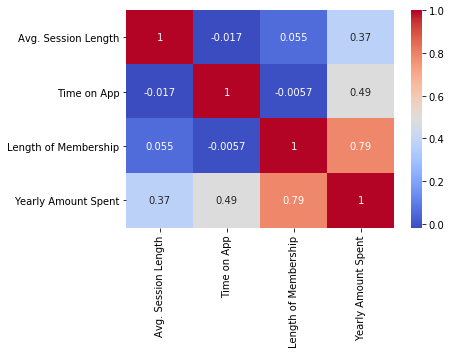

In [877]:
data2 = data1.drop(['Email', 'Address', 'Avatar', 'Time on Website', 'OLS Prediction'],axis=1)
sns.heatmap ( data2.corr ( ) , annot = True, cmap='coolwarm')
plt.show ( )

- From the above heatmap anf the VIF, we can say that there is no multicolinearity that needs to be eliminated among the significant variable.

#### e.

In [878]:
data1.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,OLS Prediction
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,594.628314
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,380.308216
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,505.068547
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,570.736845
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,591.638289


In [879]:
X.head()

,Avg. Session Length,Time on App,Length of Membership
0,1.473888,0.598170,0.542449
1,-1.154224,-1.001744,-0.977510
2,-0.055707,-0.773254,0.565938
3,1.277918,1.696927,-0.488769
4,0.281376,0.742555,0.932126


In [880]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [881]:
X_train , X_test , y_train , y_test = train_test_split ( X , y , test_size = 0.3 , random_state = 1 ) 

In [882]:
lr = LinearRegression ( )
lr.fit ( X_train , y_train )
y_pred = lr.predict ( X_test )
print ( "R2 Squared:" , r2_score ( y_test , y_pred ) )
print ( "Root Mean Squared Error:" , np.sqrt ( mean_squared_error ( y_test , y_pred ) ) )
print ( "Mean Absolute Error:" , np.sqrt ( mean_absolute_error ( y_test , y_pred ) ) )

R2 Squared: 0.9831639231053944
Root Mean Squared Error: 9.952192139851087
Mean Absolute Error: 2.7615852680004482


In [883]:
pd.DataFrame ( { "Features" : [ "Avg. Session Length" , "Time on App" , "Length of Membership" ]
                , "Coefficients" : lr.coef_ } )

,Features,Coefficients
0,Avg. Session Length,24.946556
1,Time on App,37.667809
2,Length of Membership,57.485551


In [884]:
lr.intercept_

502.84756422872204

### 7.

In [885]:
data1.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent',
       'OLS Prediction'],
      dtype='object')

In [886]:
X = data1.drop ( ['Email', 'Address', 'Avatar','Yearly Amount Spent', 'OLS Prediction'] , axis = 1 )
y = data1 [ 'Yearly Amount Spent' ]

In [887]:
for i in X.columns:
    ss = StandardScaler ( )
    X [ i ] = ss.fit_transform ( X [ i ].values.reshape ( -1 , 1 ) )

In [888]:
X_train , X_test , y_train , y_test = train_test_split ( X , y , test_size = 0.3 , random_state = 1 ) 

In [889]:
lr = LinearRegression ( )
lr.fit ( X_train , y_train )
y_pred = lr.predict ( X_test )
print ('R2: ', r2_score ( y_test , y_pred ) )
print ('MSE', mean_squared_error ( y_test , y_pred ) )
print('RMSE is: ',np.sqrt(mean_squared_error ( y_test , y_pred )))

R2:  0.983197701855496
MSE 98.84740902887188
RMSE is:  9.942203429264152


In [890]:
pd.DataFrame ( { "Features" : X.columns , "Coefficients" : lr.coef_ } )

,Features,Coefficients
0,Avg. Session Length,24.948466
1,Time on App,37.634598
2,Time on Website,0.303098
3,Length of Membership,57.495020


In [891]:
lr.intercept_

502.83720145239874

In [892]:
X.shape

(487, 4)

##### Trying to improving the to get better model using RFE:

In [893]:
rfe = RFE ( lr , n_features_to_select = 3 )
rfe.fit ( X_train , y_train )
print ( rfe.ranking_ )
print ( rfe.support_ )
rfe_pred = rfe.predict ( X_test )

df = pd.DataFrame ( { "Features" : X.columns , "Ranking" : rfe.ranking_ , "Support" : rfe.support_ } )
df

[1 1 2 1]
[ True  True False  True]


,Features,Ranking,Support
0,Avg. Session Length,1,True
1,Time on App,1,True
2,Time on Website,2,False
3,Length of Membership,1,True


In [894]:
print ( 'R2: ',r2_score ( y_test , rfe_pred ) )
print ('MSE: ', mean_squared_error ( y_test , rfe_pred ) )
print (print('RMSE is: ',np.sqrt(mean_squared_error ( y_test , rfe_pred ))))

R2:  0.9831639231053944
MSE:  99.04612838851375
RMSE is:  9.952192139851087
None


##### Trying to improving the to get better model using Lasso, Ridge and Elastic Net:

###### Lasso:

In [895]:
X = data1.drop ( ['Email', 'Address', 'Avatar','Yearly Amount Spent', 'OLS Prediction'] , axis = 1 )
y = data1 [ 'Yearly Amount Spent' ]

In [896]:
for i in X.columns:
    ss = StandardScaler ( )
    X [ i ] = ss.fit_transform ( X [ i ].values.reshape ( -1 , 1 ) )

In [897]:
x_train , x_test , y_train , y_test = train_test_split ( X , y , test_size = 0.3 , random_state = 1 ) 

In [898]:
lasso = Lasso()
lasso.fit(x_train,y_train)
train_score=lasso.score(x_train,y_train)
test_score=lasso.score(x_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [899]:
y_pred = lasso.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE is: ',RMSE)

RMSE is:  10.120711923825136


In [900]:
print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.9810815732972051
test score:  0.9825889275347556
number of features used:  3


In [901]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(x_train,y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [902]:
train_score001=lasso001.score(x_train,y_train)
test_score001=lasso001.score(x_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

In [903]:
print("training score for alpha=0.01:", train_score001 )
print("test score for alpha =0.01: "), test_score001
print("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.9816585916831695
test score for alpha =0.01: 
number of features used: for alpha =0.01: 4


In [904]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(x_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000000.0,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [905]:
train_score00001=lasso00001.score(x_train,y_train)
test_score00001=lasso00001.score(x_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

In [906]:
print("training score for alpha=0.0001 is", train_score00001 )
print("test score for alpha =0.0001 is", test_score00001)
print("number of features used: for alpha =0.0001 is", coeff_used00001)

training score for alpha=0.0001 is 0.9816586630033078
test score for alpha =0.0001 is 0.98319769946128
number of features used: for alpha =0.0001 is 4


In [907]:
lasso10k = Lasso(alpha=10000, max_iter=10e5)
lasso10k.fit(x_train,y_train)

train_score10k=lasso10k.score(x_train,y_train)
test_score10k=lasso10k.score(x_test,y_test)
coeff_used10k= np.sum(lasso10k.coef_!=0)

print("training score for alpha=0.0001:", train_score10k)
print("test score for alpha =0.0001: ", test_score10k)
print("number of features used: for alpha =0.0001:", coeff_used10k)

training score for alpha=0.0001: 0.0
test score for alpha =0.0001:  -0.00013751255521743388
number of features used: for alpha =0.0001: 0


In [908]:
#with alpha=0.01
y_pred = lasso001.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE is: ',RMSE)

RMSE is:  9.94251793844376


In [909]:
#with alpha=0.0001
y_pred = lasso00001.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE is: ',RMSE)

RMSE is:  9.942204137613151


In [910]:
#with alpha=10k
y_pred = lasso10k.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE is: ',RMSE)

RMSE is:  76.70579229978543


In [911]:
y_pred = lasso.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE is: ',RMSE)

RMSE is:  10.120711923825136


###### Ridge:

In [912]:
x = data1.drop ( ['Email', 'Address', 'Avatar','Yearly Amount Spent', 'OLS Prediction'] , axis = 1 )
y = data1 [ 'Yearly Amount Spent' ]

In [913]:
for i in X.columns:
    ss = StandardScaler ( )
    X [ i ] = ss.fit_transform ( X [ i ].values.reshape ( -1 , 1 ) )

In [914]:
lr = LinearRegression()
x_con= sm.add_constant(x)
#x1_con= x1_con.drop('const',axis=1)
x_train, x_test , y_train, y_test = train_test_split(x_con,y, test_size = 0.3, random_state = 1)
lr.fit(x_train, y_train)

C:\Users\RasAlGhul\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [915]:
# higher the alpha value, more restriction on the coefficients; 
# low alpha > more generalization, coefficients are barely
rr = Ridge(alpha=100) 
# restricted and in this case linear and ridge regression resembles
rr.fit(x_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [916]:
rr160 = Ridge(alpha=160) #  comparison with alpha value
rr160.fit(x_train, y_train)

Ridge(alpha=160, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [917]:
rr50 = Ridge(alpha=10) #  comparison with alpha value
rr50.fit(x_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [918]:
train_score=lr.score(x_train, y_train)
test_score=lr.score(x_test, y_test)

In [919]:
Ridge_train_score = rr.score(x_train,y_train)
Ridge_test_score = rr.score(x_test, y_test)

In [920]:
Ridge_train_score50 = rr50.score(x_train,y_train)
Ridge_test_score50 = rr50.score(x_test, y_test)

In [921]:
Ridge_train_score160 = rr160.score(x_train,y_train)
Ridge_test_score160 = rr160.score(x_test, y_test)

In [922]:
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score160)
print("ridge regression test score high alpha:", Ridge_test_score160)

linear regression train score: 0.9816586630084664
linear regression test score: 0.9831977018554958
ridge regression train score low alpha: 0.9207668361945344
ridge regression test score low alpha: 0.9226446356155737
ridge regression train score high alpha: 0.8637422300641331
ridge regression test score high alpha: 0.8654171953669082


In [923]:
#with alpha=100
y_pred = rr.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE is: ',RMSE)

RMSE is:  21.33258672334675


In [924]:
#with alpha=160
y_pred = rr160.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE is: ',RMSE)

RMSE is:  28.137991168783678


In [925]:
#with alpha=10
y_pred = rr50.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE is: ',RMSE)

RMSE is:  10.201190210528681


###### Elastic Net:

In [926]:
# Let's perform a cross-validation to find the best combination of alpha and l1_ratio

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=10, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

In [927]:
x = data1.drop ( ['Email', 'Address', 'Avatar','Yearly Amount Spent', 'OLS Prediction'] , axis = 1 )
y = data1 [ 'Yearly Amount Spent' ]

In [928]:
x_con= sm.add_constant(x)
x_train, x_test , y_train, y_test = train_test_split(x_con,y, test_size = 0.3, random_state = 1)
cv_model.fit(x_train, y_train)

C:\Users\RasAlGhul\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
             l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1], max_iter=2000,
             n_alphas=10, n_jobs=-1, normalize=True, positive=False,
             precompute='auto', random_state=None, selection='cyclic',
             tol=0.0001, verbose=0)

In [929]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00310312
Optimal l1_ratio: 1.000
Number of iterations 4


In [930]:
# train model with best parameters from CV
model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_, fit_intercept=True,
                   normalize = True)
model.fit(x_train, y_train)

ElasticNet(alpha=0.0031031228991584355, copy_X=True, fit_intercept=True,
           l1_ratio=1.0, max_iter=4, normalize=True, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [931]:
print('R2 for Train: ', r2_score(y_train, model.predict(x_train))) # training data performance

R2 for Train:  0.9816563080066752


In [932]:
print('R2 for Test',r2_score(y_test, model.predict(x_test))) # test data performance

R2 for Test 0.9831896763656748


In [933]:
y_pred = model.predict(x_test)
RMSE = np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE using ElasticNet Regression with best parameters from CV is: ',RMSE)

RMSE using ElasticNet Regression with best parameters from CV is:  9.944577554699652


### 8. Summarizing:

#### a. Summarize the overall fit of the model and listing down the measures to prove that it is a good model 

- The overall best fit of the model is achived with ElasticNet Regression.
- The R2 for train data is 98.16%
- The R2 for test data is 98.31%
- The RMSE achieved by this is 9.94

#### b. Business interpretation/explanation of the model

- With this model it will be more likely to predect the total amount that a candidate may spend. Based on this the company could target such candidate.
- Company can also focus of the candidates with less spend and using the model to decide the variable that affecting the less amount spent.

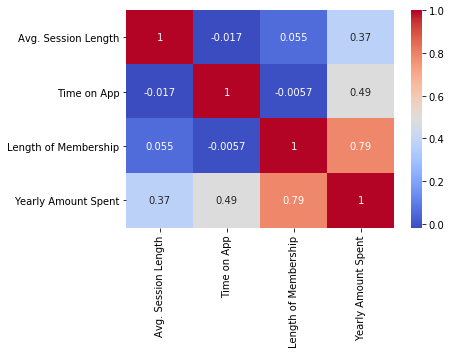

In [934]:
data2 = data1.drop(['Email', 'Address', 'Avatar', 'Time on Website', 'OLS Prediction'],axis=1)
sns.heatmap ( data2.corr ( ) , annot = True, cmap='coolwarm')
plt.show ( )

- The above graph shows how the independent variable are correlated with the dependent variable.
- The significant variable that is condsidered for the model to best fit are:
    - Avg. Session Length
    - Time on App
    - Length of Membership

#### c. What changes from the base model had the most effect on model performance? 

- Dropping of insignificant variables has the biggest change overall.
- Regularization of the model has helped to improve the final model from the base model 

#### d. What are the key risks to your results and interpretation? 

- The key risks could be using Random Frests regressor instead of Linear Regression to get better accuracy and best fit model.